In [1]:
import pandas as pd
df = pd.read_csv('ClassificationProblem1.txt',sep=" ",header='infer',delimiter="\t")

In [2]:
df.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


In [3]:
df.info() # no null values #F15,F16 object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101180 entries, 0 to 101179
Data columns (total 24 columns):
Index    101180 non-null int64
F1       101180 non-null float64
F2       101180 non-null float64
F3       101180 non-null float64
F4       101180 non-null float64
F5       101180 non-null int64
F6       101180 non-null int64
F7       101180 non-null int64
F8       101180 non-null int64
F9       101180 non-null int64
F10      101180 non-null int64
F11      101180 non-null int64
F12      101180 non-null int64
F13      101180 non-null int64
F14      101180 non-null int64
F15      101180 non-null object
F16      101180 non-null object
F17      101180 non-null int64
F18      101180 non-null int64
F19      101180 non-null int64
F20      101180 non-null int64
F21      101180 non-null int64
F22      101180 non-null int64
C        101180 non-null int64
dtypes: float64(4), int64(18), object(2)
memory usage: 17.8+ MB


In [4]:
from datetime import datetime
 
year = lambda x: datetime.strptime(x,'%m/%d/%Y').year
df['yearF15'] = df['F15'].map(year)
df['yearF16'] = df['F16'].map(year)

month = lambda x: datetime.strptime(x,'%m/%d/%Y').month
df['monthF15'] = df['F15'].map(month)
df['monthF16'] = df['F16'].map(month)

day = lambda x: datetime.strptime(x,'%m/%d/%Y').day
df['dayF15'] = df['F15'].map(day)
df['dayF16'] = df['F16'].map(day)

In [5]:
df.drop(['F15','F16'],axis=1,inplace=True)
C= df.pop('C') # moving to the end
df['C']= C

In [6]:
(df['C']==1).value_counts() # imbalanced class

False    76353
True     24827
Name: C, dtype: int64

In [7]:
X = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22',
       'yearF15', 'yearF16', 'monthF15', 'monthF16', 'dayF15', 'dayF16']]

y = df['C']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [9]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Fitting Logistic Regression to the Training set
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(penalty='l2',solver='sag',class_weight='balanced',n_jobs=-1)
lr_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10468 12405]
 [  783  6698]]
             precision    recall  f1-score   support

          0       0.93      0.46      0.61     22873
          1       0.35      0.90      0.50      7481

avg / total       0.79      0.57      0.59     30354



c:\users\abhishek .desktop-aklkmr5\python\python36-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Feature ranking:
1. feature 17 (0.056943)
2. feature 16 (0.056504)
3. feature 3 (0.039171)
4. feature 1 (0.038637)
5. feature 13 (0.038431)
6. feature 12 (0.038334)
7. feature 0 (0.038024)
8. feature 5 (0.037971)
9. feature 9 (0.037922)
10. feature 2 (0.037920)
11. feature 6 (0.037916)
12. feature 8 (0.037870)
13. feature 7 (0.037833)
14. feature 11 (0.037775)
15. feature 10 (0.037746)
16. feature 4 (0.037740)
17. feature 24 (0.037430)
18. feature 25 (0.037430)
19. feature 20 (0.036882)
20. feature 21 (0.036756)
21. feature 14 (0.036166)
22. feature 23 (0.036146)
23. feature 22 (0.036041)
24. feature 15 (0.032829)
25. feature 19 (0.031909)
26. feature 18 (0.031672)


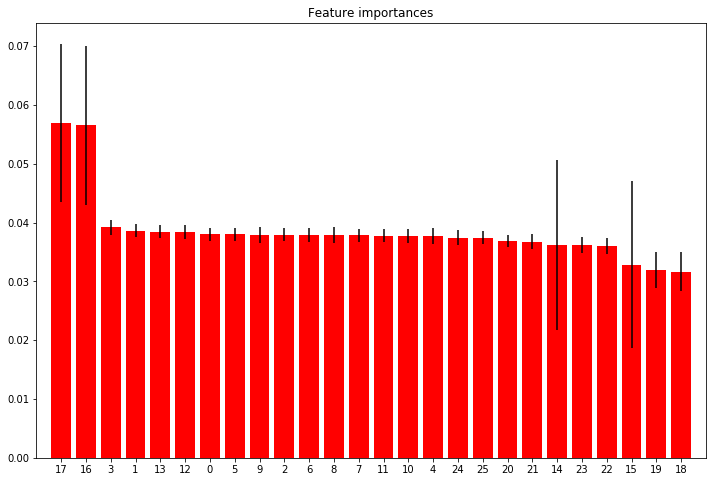

In [11]:
# Build a forest and compute the feature importances

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [12]:
# Create correlation matrix to check for columns to drop

import numpy as np
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(df.columns[to_drop], axis=1).head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F20,F21,F22,yearF15,yearF16,monthF15,monthF16,dayF15,dayF16,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,305,1,2,1986,1992,10,9,4,6,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,206,18,7,1979,1983,2,1,24,5,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,315,1,4,1989,1986,1,11,12,22,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,304,15,1,1982,1992,2,6,18,10,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,240,1,1,1987,1985,4,10,10,19,0


In [13]:
# use SMOTE to remove class imbalance 

from collections import Counter
from imblearn.over_sampling import SMOTE 

print('Original dataset shape {}'.format(Counter(y)))

sm = SMOTE()
X, y = sm.fit_sample(X, y)

print('Resampled dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 76353, 1: 24827})
Resampled dataset shape Counter({0: 76353, 1: 76353})


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [15]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(penalty='l2',solver='sag',class_weight='balanced',n_jobs=-1)
lr_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10694 12214]
 [ 3129 19775]]
             precision    recall  f1-score   support

          0       0.77      0.47      0.58     22908
          1       0.62      0.86      0.72     22904

avg / total       0.70      0.67      0.65     45812



In [17]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion = 'gini')
tree_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_tree = tree_classifier.predict(X_test)

# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test,y_pred_tree))

[[17407  5501]
 [ 5005 17899]]
             precision    recall  f1-score   support

          0       0.78      0.76      0.77     22908
          1       0.76      0.78      0.77     22904

avg / total       0.77      0.77      0.77     45812



In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'gini')
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = rf_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[20379  2529]
 [ 5785 17119]]
             precision    recall  f1-score   support

          0       0.78      0.89      0.83     22908
          1       0.87      0.75      0.80     22904

avg / total       0.83      0.82      0.82     45812



In [19]:
# Fitting XGBoost to the Training set

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
xgb_classifier = XGBClassifier(max_depth=7,n_estimators=50,n_jobs=-1)
xgb_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_xgb = xgb_classifier.predict(X_test)

# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[21622  1286]
 [ 6858 16046]]
             precision    recall  f1-score   support

          0       0.76      0.94      0.84     22908
          1       0.93      0.70      0.80     22904

avg / total       0.84      0.82      0.82     45812



In [20]:
# Applying k-Fold Cross Validation

accuracies_xgb = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = 10)
print(accuracies_xgb.mean())
print(accuracies_xgb.std())

0.8241903395433651
0.0034376084235530706


Hence,Random Forest is the best classifier for this dataset.